## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Perform EDA

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


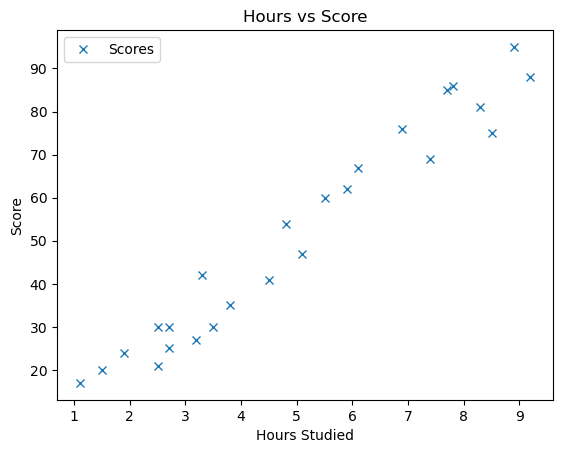

In [5]:
df.plot(x = 'Hours',y = 'Scores', style = 'x')
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score') 
plt.show()

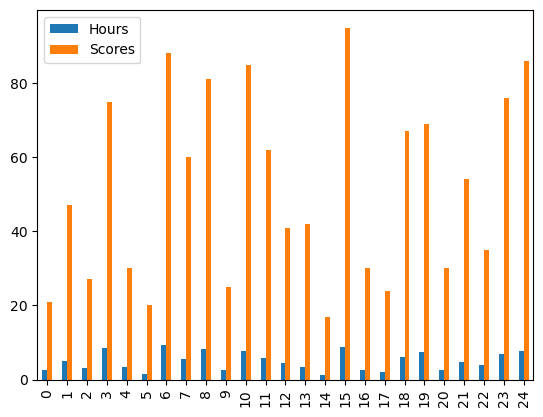

In [6]:
df.plot(kind = 'bar')
plt.show()

## Split into Test and Train data

In [7]:
X = df['Hours'].values
y = df['Scores'].values
X = X.reshape(-1,1)
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

## Create model, train and predict

In [9]:
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [10]:
y_pred = lin_reg.predict(X_test)

In [11]:
print(mean_absolute_error(y_test, y_pred))

3.9207511902099244


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference' : (y_test - y_pred)})
df.head()

,Actual,Predicted,Difference
0,81,83.188141,-2.188141
1,30,27.032088,2.967912
2,21,27.032088,-6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


## Test the prediction for 9.25 hrs

In [13]:
hours = 9.25
test_pred = lin_reg.predict(np.array(hours).reshape(1, -1))

print(f"Score predicted for {hours} hrs is {round(test_pred[0],2)} percent")

Score predicted for 9.25 hrs is 92.39 percent
